<font size=7> Project 6

In this homework you learn how to **plot** and **analyze** neurological data from brain organoids similar to this paper: https://www.nature.com/articles/s41467-022-32115-4

# <font color="grey">Notebook Setup

This homework can be done entirely with numpy and matplot lib. So, our first step is to import those packages and load our data file.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = np.load("data.npz", allow_pickle=True)

The data that we are working with is raw data that has been packaged together as a zipped numpy array. Lets start by inspecting the structure of this file. 

In [9]:
print(data.files, "\n")
print(f"trains's type is: {type(data['train'])}")
print(f"neuron_data's type is: {type(data['neuron_data'])}")
print(f"redundant_pairs's type is: {type(data['redundant_pairs'])}")
print(f"fs's type is: {type(data['fs'])}")

['train', 'neuron_data', 'redundant_pairs', 'fs'] 

trains's type is: <class 'numpy.ndarray'>
neuron_data's type is: <class 'numpy.ndarray'>
redundant_pairs's type is: <class 'numpy.ndarray'>
fs's type is: <class 'numpy.ndarray'>


We see that the zipped file contains 4 different numpy arrays. Each key corresponds to a different aspect of the recording.

1. `train`: This key contains the spike train data. It is a dictionary where each key corresponds to a neuron, and the value is a list of spike times for that neuron. In other words, for each neuron, we have a list of timestamps indicating when each spike occurred during the recording.

2. `neuron_data`: This key contains additional data about the neurons, such as their spatial positions or other relevant attributes. It helps us understand the context of each neuron's activity.

3. `redundant_pairs`: This key contains information about pairs of neurons that have redundant activity. This can be useful for identifying functional connections or redundancies.

4. `fs`: This key represents the sampling frequency of the recording. It tells us the rate at which the data was sampled, which is crucial for accurate time-based analyses.

In [14]:
# Create a dictionary object from the train object
# Data["train"] returns a 0 dimensional object, .item() extracts the actual dictionary in this object
spike_times = data["train"].item() 


neuron_data = data["neuron_data"].item() # makes the neuron_data and sampling frequency data usable
fs = data["fs"]


#for testing
train = [times / fs for _, times in spike_times.items()] # adjusts the train times by taking the frequency into account (to seconds)


If you wish to inspect each of these keys further you can print the objects that are defined in the cells above/below. (i.e. `print(spike_times)`)

# Create a Spike Raster

The first step in analyzing our data is to understand the information contained within the train dictionary. This dictionary holds the spike train data for each recorded neuron. Specifically, a spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each entry in the matrix is a moment in time where a neuron emits a signal. 

In this section we will use the train dictionary to figure out how many neurons there are, the total duration of the recording, and to create a visualization of neuronal activity.

**How many neurons are in our dataset? (3 pts)**

In [20]:
### YOUR CODE GOES HERE ###
print(len(spike_times)) # returns amount of keys in spike_times which is the amount of neurons

182


**What is the total duration of our recording? (3 pts)**

In [23]:
longest_spike_time = 0 
for time in train:
    if max(time) > longest_spike_time: #takes the maximum spike time of each neuron
        longest_spike_time = max(time) #sets the maximum spike time of the neuron to the longest spike time if it is bigger
print(longest_spike_time, "seconds")

179.7811 seconds


We are now going to visualize the information in the spike train. To do this we will create a "spike raster plot." In a spike raster plot the x-axis represents time and has values from 0 to the duration of the recording. The y-axis values correspond to the neuron number, its range is from 0 to the total number of neurons in the dataset.

Each data point in the plot represents a spike, and any point along a horizontal row corresponds to the spikes of a single neuron over time. This means that each row shows the activity of one neuron, with spikes appearing as dots at the specific times they occurred. 

Raster plots are helpful in vizualizing firing patterns in groups of neurons  

A sample plot has been included below

### raster plot ( 4 pts)

![alt text](spikeraster.png)

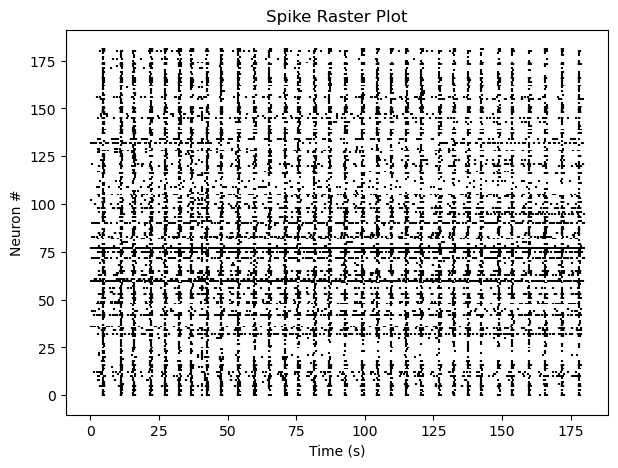

In [27]:
# Create the raster plot
plt.figure(figsize=(7, 5))

plt.eventplot(
    positions=train,            # each element is an array of spike times
    orientation='horizontal',   # horizontal orientation => time on x-axis
    colors='black',
    lineoffsets=np.arange(len(train)),  # which y offset each "train" goes to
    linelengths=1             # how tall each little dash will appear
)

# Labeling
plt.xlabel("Time (s)") 
plt.ylabel("Neuron #")
plt.title("Spike Raster Plot")
plt.autoscale() # Let Matplotlib decide x,y bounds

# Show the plot
plt.show()

# Spatial Firing Rate

The next step in our analysis is to visualize the firing rates of neurons in relation to their spatial positions. We will do this by following these steps:

1. Calculate the Average Firing Rate:
    Using only the information contained in the spike train data, we can determine the average firing rate for each neuron. It is defined as the total number of spikes divided by total time (in seconds):

2. Visualize Neuron Positions:
    With the information from the neuron_data key, which contains the spatial positions of each neuron, we can create a plot that shows where each neuron is located.

3. Overlay Firing Rates:
    Finally, we will overlay the average firing rates onto the neuron position plot. This will be done by using bubbles at each neuron's position, where the size of each bubble corresponds to the neuron's average firing rate. 
    
This will allow us to look at how neuronal activity varies across different spatial locations.

## Calculate the Mean Firing Rate for each Neuron (5 pts)


Your answer here should be an array whose length corresponds to the total number of neurons, where each entry corresponds to the average firing rate of that neuron

In [33]:
def calculate_mean_firing_rates(train, recording_length):
    mean_firing_rates = []
    for neuron_spikes in train:
        num_spikes = len(neuron_spikes)
        firing_rate = num_spikes / recording_length
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

In [35]:
### YOUR CODE GOES HERE ###
print(calculate_mean_firing_rates(train, longest_spike_time)) # using longest spike time



[1.75769311 0.3893624  0.22805512 0.76203783 0.18355656 3.0648383
 0.91778279 0.3059276  0.66191607 0.26142904 0.65079143 0.32817688
 0.556232   0.23361744 0.89553351 0.60073056 2.83678318 0.12237104
 0.63966679 0.11680872 0.31148992 0.12237104 0.14462032 0.278116
 0.10568408 0.11680872 0.18355656 0.26699136 0.18355656 0.12237104
 0.11680872 1.52407567 1.93012502 0.15574496 5.77368811 0.90109583
 0.22805512 0.73422623 0.4727972  0.10012176 0.28924064 0.20024352
 4.63897484 0.35042616 0.76760015 0.2503044  0.12237104 0.15018264
 2.04693374 0.68972767 0.15018264 4.52216612 0.35042616 6.51347667
 0.40048704 0.20024352 0.56179432 0.13349568 0.21136816 1.14583791
 3.29845573 2.56979182 0.2224928  1.22371039 1.49626407 4.83921836
 0.278116   0.35598848 0.45611024 0.14462032 1.25152199 0.14462032
 1.33495679 0.40048704 0.73422623 3.14271077 1.14027559 5.67912867
 0.18911888 1.52963799 0.22805512 0.17243192 1.33495679 1.61307279
 1.09577703 2.05805838 0.24474208 1.56857423 0.63966679 0.1334956

# Plot the Spatial Position of each Neuron (10 pts)
A sample plot has been included below

![alt text](spatialmap.png)

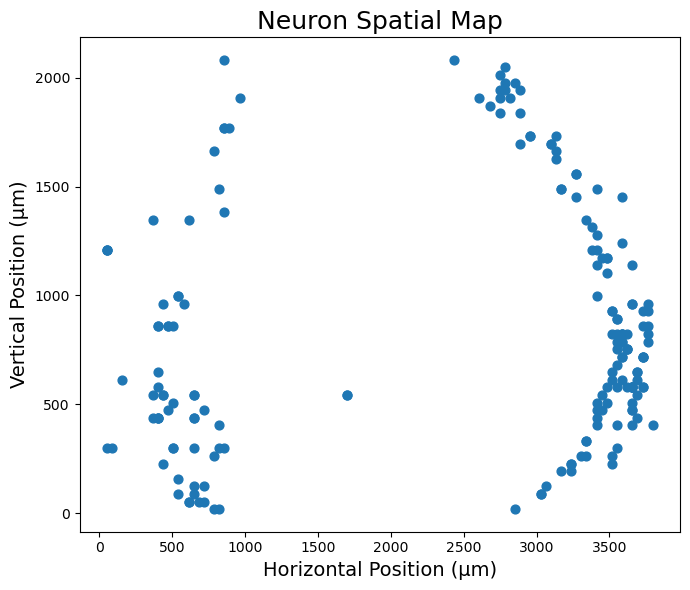

In [39]:
### YOUR CODE GOES HERE ###
plt.figure(figsize=(7, 6))#create the plot
neuron_positions= {}
for neuron, data in neuron_data.items():
    xy_pos = data['position']
    x_pos = xy_pos[0]
    y_pos = xy_pos[1]
    neuron_positions[neuron] = np.array([x_pos, y_pos])
    
# Extract x and y coordinates for plotting
x_positions = [pos[0] for pos in neuron_positions.values()]
y_positions = [pos[1] for pos in neuron_positions.values()]

# Create the scatter plot
plt.scatter(x_positions, y_positions, color='#1f77b4', s=40)

# Add labels and title
plt.xlabel('Horizontal Position (μm)', fontsize=14)
plt.ylabel('Vertical Position (μm)', fontsize=14)
plt.title('Neuron Spatial Map', fontsize=18)

# Customize the plot appearance
plt.grid(False)  # Turn off grid
plt.tight_layout()  # Adjust padding for better appearance

# Show the plot
plt.show()
    




# Plot a Spatial Map of Average Single Neuron Firing Rate (5 pts)

We can now combine the list of average firing rates with our spatial map to get a nice visualiation of how firing rate may vary with position.

A sample plot has been included below

Hint: 
You don't need to write new code for this plot. Use the code for your spatial map and add two parameters to the line where you create the plot (refer to the matplotlib documentation). Set each data point's size to depend on its corresponding average firing rate value. Also, adjust for overlapping data points.

![alt text](spatialmap_avg_firing.png)

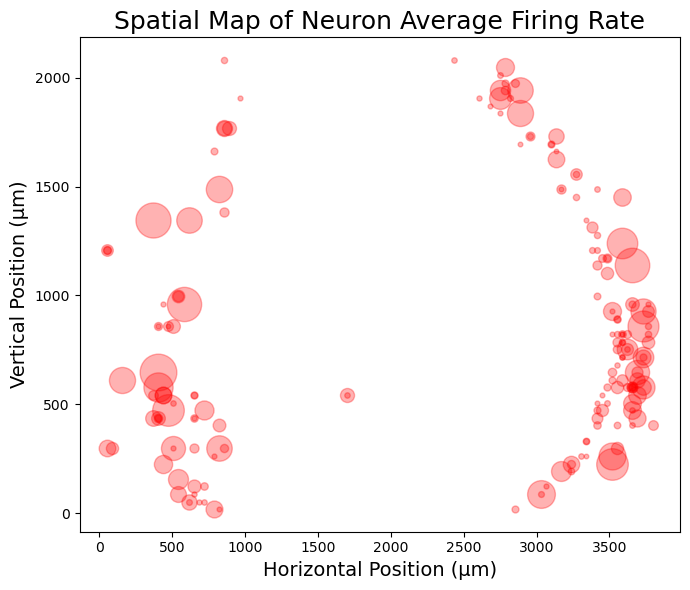

In [46]:
### YOUR CODE GOES HERE ###
plt.figure(figsize=(7, 6))#create the plot
#for calculating ratio of firing rates
max_firing_rate = max(calculate_mean_firing_rates(train, longest_spike_time))
mean_firing_rate = calculate_mean_firing_rates(train, longest_spike_time)

for neuron, data in neuron_data.items(): #iterates through neuron_data dictionary containing neuron positions
    xy_pos = data['position']
    x_pos = xy_pos[0]
    y_pos = xy_pos[1]
    point_size = 700*mean_firing_rate[neuron]/max_firing_rate # changes size based on average firing rate
    plt.scatter(x_pos, y_pos, s=point_size,  #plots data
        color='red', 
        alpha=0.3
    )

# Add labels and title
plt.xlabel('Horizontal Position (μm)', fontsize=14)
plt.ylabel('Vertical Position (μm)', fontsize=14)
plt.title('Spatial Map of Neuron Average Firing Rate', fontsize=18)

# Customize the plot appearance
plt.grid(False)  # Turn off grid
plt.tight_layout()  # Adjust padding for better appearance

# Show the plot
plt.show()

# Plot the Population Level Activity

Remember the raster plot from before? There, we used the spike train data to create a raster plot, and represent the activity of *individual neurons* at points in time. What is we wanted to looked at the *population activity*? 

In this section, we'll lead you through making population level activity plot. This will be similar to the raster plot from before, but instead of showing individual neurons, we'll show the firing rate of the entire population of neurons at each point in time.

First, we'll need to calculate the population firing rate at each point in time. This is a little tricky, so we've given you the function below. 

**Your first task for this section is to add DocStrings and Comments to the function to briefly explain what each line does.**

In [564]:
def get_population_fr(trains: list, bin_size=0.1, w=5):
    
    '''
    Calculates the population firing rate of neurons from a lits of spike times extracted from a dictionary   
    
    This function creates a histogram of spikes that estimates the population firing rate over time

    Params:
        trains (list) : is a dictionary, with each key corresponding to a different neuron and 
                        the corresponding value being a list of all of it's spike times
        bin_size (float, optional): Time bin size in seconds for the histogram
                                    Determines the temporal resolution of the firing rate.
                                    Defaults to 0.1 seconds.
        w (int, optional): Window size for the moving average convolution that smooths
                          the firing rate. Larger values create smoother curves.
                          Defaults to 5 bins.
    Returns: 
        A tuple containing: numpy.ndarray: Bin edges (time points in seconds) excluding the first edge
                                        numpy.ndarray: Smoothed population firing rate (spikes/second)                
    '''

    trains = np.hstack(trains)                              # Concatenate all spike trains
    rec_length = np.max(trains)                             # Gets the recording length from max spike
    bin_num = int(rec_length// bin_size) + 1                # Calculate number of bins needed
    bins = np.linspace(0, rec_length, bin_num)          
    fr = np.histogram(trains, bins)[0] / bin_size       
    fr_avg = np.convolve(fr, np.ones(w), 'same') / w    
    return bins[1:], fr_avg                           

Now that you understand the function to find the average firing rates, **your next job is to plot it!** 

*Hints: Start with calling the function, and using the results as inputs for the plt.plot() function.*
    *Make sure to include x and y labels, and a title for full credit!*
    
 ### population firing rate (10 pts)

![alt text](pop_avg_firing.png)

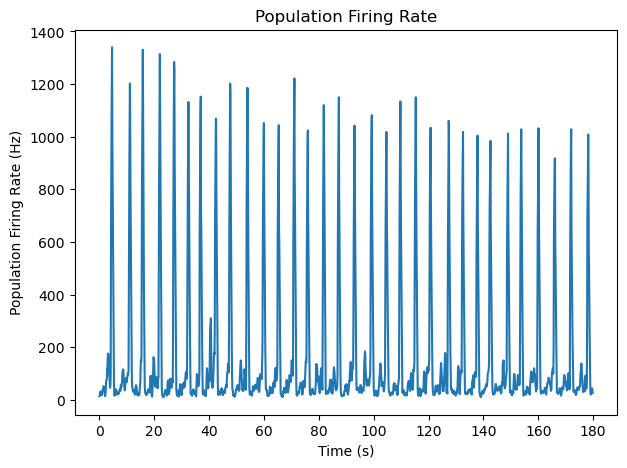

In [568]:
### YOUR CODE GOES HERE ###
#np.set_printoptions(threshold=np.inf) #prints all values
pop_fr = get_population_fr(train)

bins_list = pop_fr[0] #takes the list of bins from get_population_fr()
avg_fr = pop_fr[1] #takes the list of average firing rate from get_population_fr()

plt.figure(figsize=(7, 5))
plt.plot(bins_list, avg_fr, color='#1f77b4') #blue color
plt.xlabel("Time (s)")
plt.ylabel("Population Firing Rate (Hz)")
plt.title("Population Firing Rate")
plt.grid(False)  # Turns off the grid
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180]) 

plt.show()


# Plot Overlayed Graphs - Population and Individual Spike Raster (10 pts)

Learning how to plot multiple graphs on the same figure is a useful skill. **Your job is to combine the *individual neuron* raster plot and the *population activity* plot into one figure.**

![alt text](overlayed_fig.png)

*Steps for getting started:* 
- *Start by creating a figure and axis object using plt.subplots()*
- *Use the axis object to plot the individual neuron raster plot*
- *Use axs1 = axs.twinx() to create a second y-axis on the right side of the plot*
- *Use axs1 to plot the average population firing rate*
- *Make sure to include labels and a title for full credit!*

*It's also very helpful to get used to looking through APIs if you are unsure how to start!*
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.twinx.html

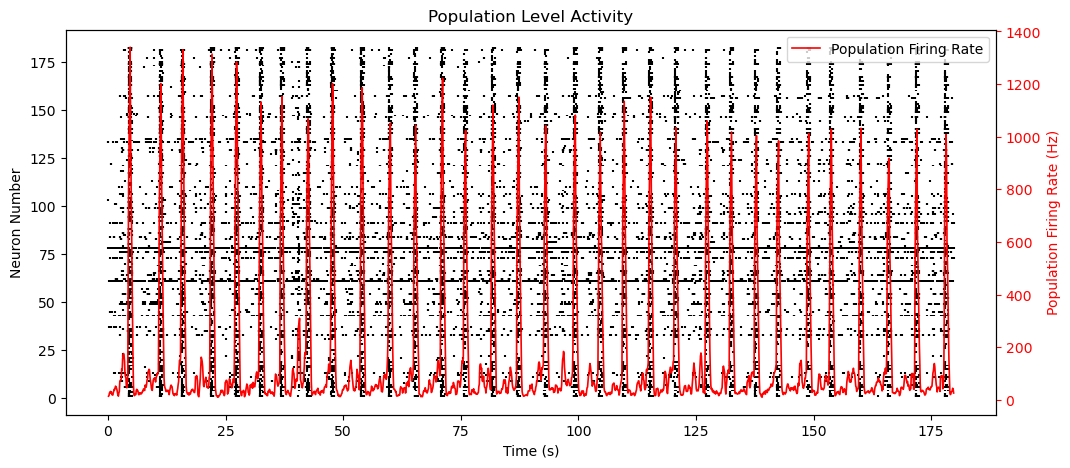

In [573]:
### YOUR CODE GOES HERE ###

# train = list of spike times for each neuron (used in raster plot)

# Create figure and axis
fig, axs = plt.subplots(figsize=(12, 5))

# Raster plot (existing neuron spike times)
for neuron, neuron_spike_times in enumerate(train):  
    axs.vlines(neuron_spike_times, neuron + 0.5, neuron + 1.5, color="black")


axs.set_xlabel("Time (s)")
axs.set_ylabel("Neuron Number")
axs.set_title("Population Level Activity")

# Create second y-axis for firing rate
axs1 = axs.twinx() # makes second plot for overlap
axs1.plot(bins_list, avg_fr, color="red", label="Population Firing Rate", linewidth=1.2)
axs1.set_ylabel("Population Firing Rate (Hz)", color="red")
axs1.legend(loc="upper right")
axs1.tick_params(axis='y', colors='red')  # Set y-tick labels to red
axs1.yaxis.label.set_color('red')         # Also set the y-axis label to red

plt.show()

# Extra Credit - Plot the STTC Heatmap (5 pts)

In this extra credit section, we will explore the functional connectivity between neurons using the Spike Time Tiling Coefficient (STTC). Functional connectivity refers to the statistical dependencies between neuronal activities, indicating how neurons influence each other's firing patterns.

The STTC is a measure used to quantify the temporal correlation between the spike trains of pairs of neurons. It provides a value between -1 and 1, where:

- A positive value indicates a positive correlation (neurons tend to fire together).
- A negative value indicates a negative correlation (neurons tend to avoid firing together).
- A value around 0 suggests no significant correlation.

You are provided with a function that calculates the STTC matrix for the spike train data. The STTC matrix is a square matrix where each element represents the STTC value between a pair of neurons. The matrix has 1's along the diagonal because the values along the diagonal correspond to a pairing of a neuron with itself.

Your task is to use the output matrix to create a heat map of the functional connectivity. This will help you visualize the strength and direction of connectivity between all pairs of neurons in the dataset. You should include a colorbar, proper labels, and axis ticks.

A sample heatmap has been included below.


Hint:
Be mindful of the axis ticks. By default, there will be one tick per neuron, causing the labels to overlap and become unreadable. You need to limit the total number of ticks and space them out evenly with appropriate labels.


The function below computes the sttc matrix. 

In [50]:
def compute_sttc_matrix(spike_train, length, delt=20):
    def time_in_delt(tA, delt, tmax):
        if len(tA) == 0:
            return 0

        base = min(delt, tA[0]) + min(delt, tmax - tA[-1])
        return base + np.minimum(np.diff(tA), 2 * delt).sum()

    def sttc_pairs(tA, tB, TA, TB, delt):
        def spikes_in_delt(tA, tB, delt):
            if len(tB) == 0:
                return 0
            tA, tB = np.asarray(tA), np.asarray(tB)
            iB = np.searchsorted(tB, tA)
            np.clip(iB, 1, len(tB) - 1, out=iB)
            dt_left = np.abs(tB[iB] - tA)
            dt_right = np.abs(tB[iB - 1] - tA)
            return (np.minimum(dt_left, dt_right) <= delt).sum()

        PA = spikes_in_delt(tA, tB, delt) / len(tA)
        PB = spikes_in_delt(tB, tA, delt) / len(tB)

        aa = (PA - TB) / (1 - PA * TB) if PA * TB != 1 else 0
        bb = (PB - TA) / (1 - PB * TA) if PB * TA != 1 else 0
        return (aa + bb) / 2

    N = len(spike_train)
    T = length
    ts = [time_in_delt(ts, delt, T) / T for ts in spike_train]

    matrix = np.diag(np.ones(N))
    for i in range(N):
        for j in range(i + 1, N):
            matrix[i, j] = matrix[j, i] = sttc_pairs(
                spike_train[i], spike_train[j], ts[i], ts[j], delt
            )
    return matrix


A sample heatmap has been included below

![alt text](heatmap.png)

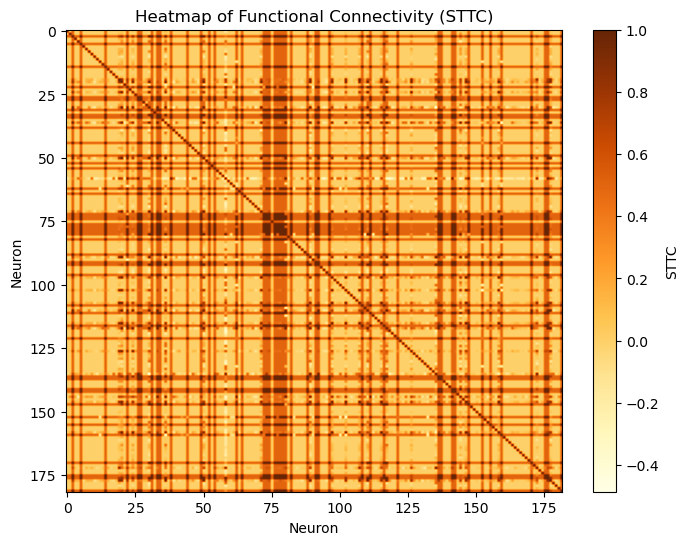

In [52]:
### YOUR CODE GOES HERE ###
sttc_data = compute_sttc_matrix(train, longest_spike_time)
# Create a figure and axes
plt.figure(figsize=(8, 6))  # Adjust size as needed

# Display the heatmap
# aspect='auto' helps fill the figure, but you can adjust or remove it
plt.imshow(sttc_data, cmap='YlOrBr', aspect='auto')

# Add a colorbar (legend) for reference
plt.colorbar(label='STTC')

# Optional: Add labels and a title
plt.title('Heatmap of Functional Connectivity (STTC)')
plt.xlabel('Neuron')
plt.ylabel('Neuron')

# Display the plot
plt.show()

